In [19]:
# Import necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
%config IPCompleter.greedy=True

In [2]:
%matplotlib inline

In [7]:
# reading the data
dataset = pd.read_csv('../data/clean_train.csv')

In [9]:
dataset.head()

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,1,SC20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,2,SC60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,3,SC70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,4,SC60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2008,WD,Normal,250000


In [10]:
dataset.tail()

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1455,SC60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,Aug,2007,WD,Normal,175000
1456,1456,SC20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,...,0,No,MnPrv,No,0,Feb,2010,WD,Normal,210000
1457,1457,SC70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,...,0,No,GdPrv,Shed,2500,May,2010,WD,Normal,266500
1458,1458,SC20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,Apr,2010,WD,Normal,142125
1459,1459,SC20,RL,75.0,9937,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,Jun,2008,WD,Normal,147500


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
dataset.describe()

,Unnamed: 0,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,729.500000,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,2007.815753,180921.195890
std,421.610009,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,1.328095,79442.502883
min,0.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
25%,364.750000,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,129975.000000
50%,729.500000,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,163000.000000
75%,1094.250000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,214000.000000
max,1459.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,2010.000000,755000.000000


In [13]:
dataset.shape

(1460, 81)

### Finding Numerical Data in Dataset

In [16]:
numerical_columns = list(dataset._get_numeric_data().columns)
numerical_columns

['Unnamed: 0',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'YrSold',
 'SalePrice']

### Finding Categorical Data in Dataset

In [27]:
categorical_columns = list(set(dataset.columns) - set(numerical_columns))
categorical_columns

['Exterior2nd',
 'Heating',
 'BsmtExposure',
 'GarageType',
 'FireplaceQu',
 'SaleCondition',
 'Alley',
 'LotConfig',
 'GarageCond',
 'SaleType',
 'Functional',
 'MiscFeature',
 'HeatingQC',
 'LotShape',
 'BsmtCond',
 'Utilities',
 'Exterior1st',
 'GarageFinish',
 'Street',
 'GarageQual',
 'MSSubClass',
 'PoolQC',
 'PavedDrive',
 'BsmtQual',
 'LandContour',
 'CentralAir',
 'Neighborhood',
 'ExterCond',
 'Electrical',
 'Condition2',
 'BldgType',
 'Condition1',
 'MoSold',
 'MSZoning',
 'ExterQual',
 'HouseStyle',
 'BsmtFinType1',
 'Fence',
 'BsmtFinType2',
 'RoofStyle',
 'RoofMatl',
 'MasVnrType',
 'Foundation',
 'LandSlope',
 'KitchenQual']

# Univariate Analysis
The purpose of Univariate Analysis is to describe/summarize and find patterns in single features of the data. 

## Numerical features in univariate variables

In order to make any prediction we need to fit a linear regression model, so we made sure the distribution of the variables is almost linear.

Now to check the linearity of the variables we check for any skewness in the distribution and outliers in the data.

The variables we check for were 'OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'Neighborhood' and the target variable 'SalePrice'.

### Histogram

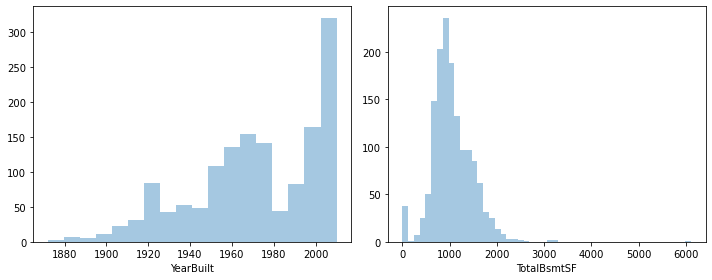

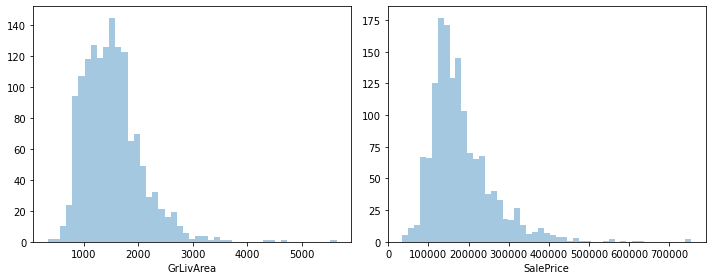

In [24]:
cols = ['YearBuilt','TotalBsmtSF', 'GrLivArea', 'SalePrice']
for i in range(0, len(cols), 2):
    if i+1 < len(cols):
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.distplot(dataset[cols[i]], kde=False)
        plt.subplot(122)
        sns.distplot(dataset[cols[i+1]], kde=False)
        plt.tight_layout()
        plt.show()
    else:
        sns.distplot(dataset[cols[i]], kde=False)

### KDE

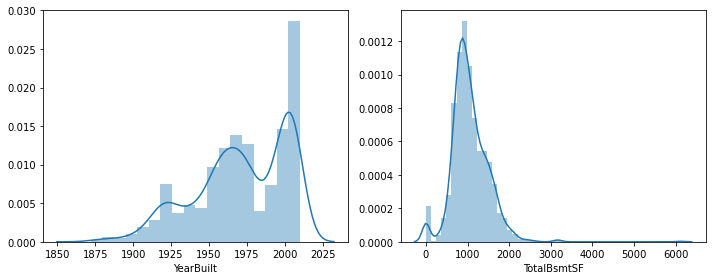

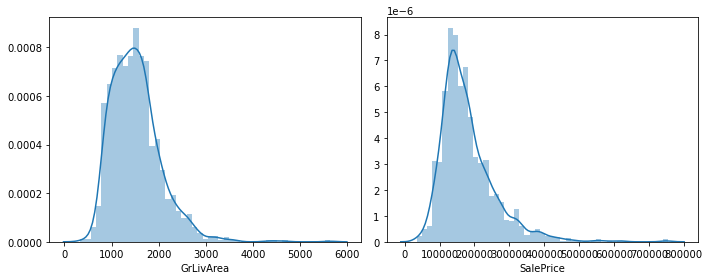

In [25]:
cols = ['YearBuilt','TotalBsmtSF', 'GrLivArea', 'SalePrice']
for i in range(0, len(cols), 2):
    if i+1 < len(cols):
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.distplot(dataset[cols[i]], kde=True)
        plt.subplot(122)
        sns.distplot(dataset[cols[i+1]], kde=True)
        plt.tight_layout()
        plt.show()
    else:
        sns.distplot(dataset[cols[i]], kde=True)

### Boxplots

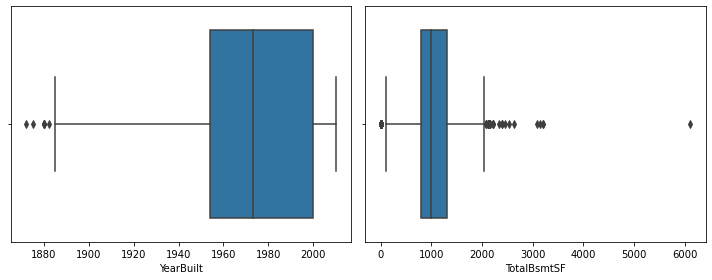

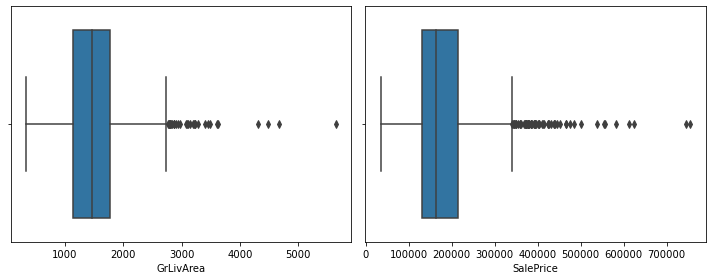

In [26]:
# Boxplots

cols = ['YearBuilt','TotalBsmtSF', 'GrLivArea', 'SalePrice']
for i in range(0, len(cols), 2):
    if i+1 < len(cols):
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.boxplot(cols[i], data=dataset)
        plt.subplot(122)
        sns.boxplot(cols[i+1], data=dataset)
        plt.tight_layout()
        plt.show()
    else:
        sns.boxplot(cols[i], data=dataset)

## Categorical Features in Univariate Analysis

The following features from the above categorical_columns will be selected for analysis:
- Neighborhood
- SaleCondition
- BldgType

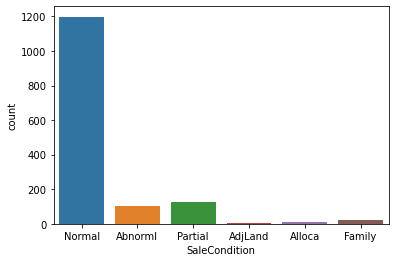

In [28]:
sns.countplot('SaleCondition', data=dataset)

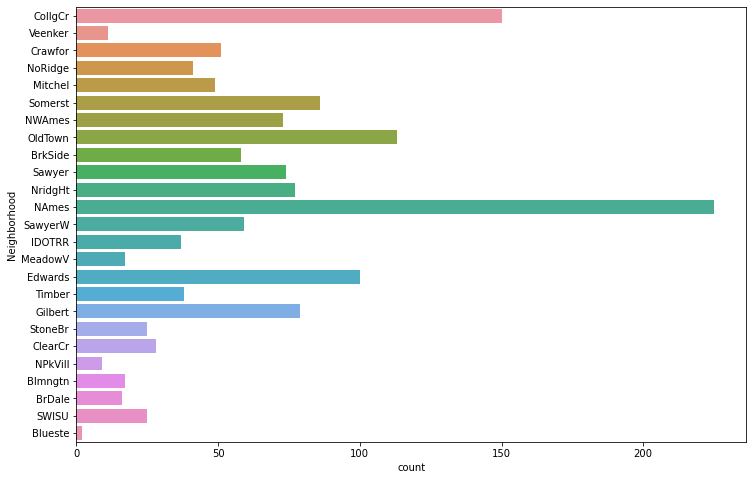

In [36]:
plt.figure(figsize=(12,8))
sns.countplot(y='Neighborhood', data=dataset)

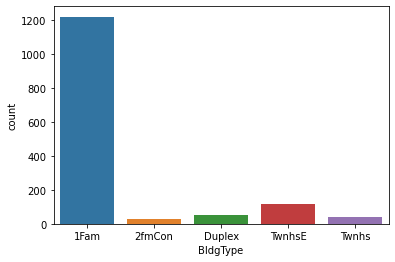

In [37]:
sns.countplot('BldgType', data=dataset)

# Multivariate Analysis 
Multivariate Analysis is performed between multiple variables to determine relationships between them

### Numerical vs Numerical analysis

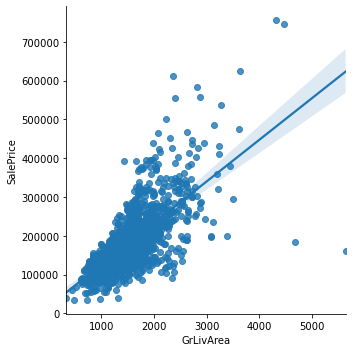

In [43]:
# lmplot

sns.lmplot('GrLivArea', 'SalePrice', data=dataset, fit_reg=True)

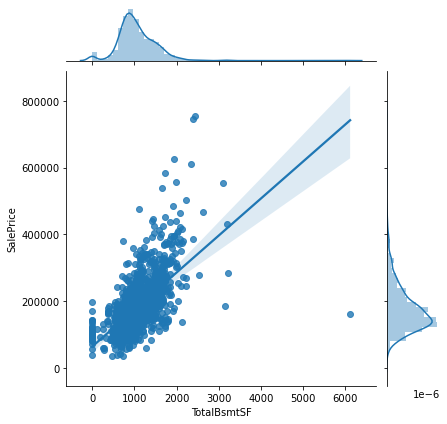

In [44]:
# jointplot with regressor

sns.jointplot('TotalBsmtSF','SalePrice',data=dataset, kind='reg')

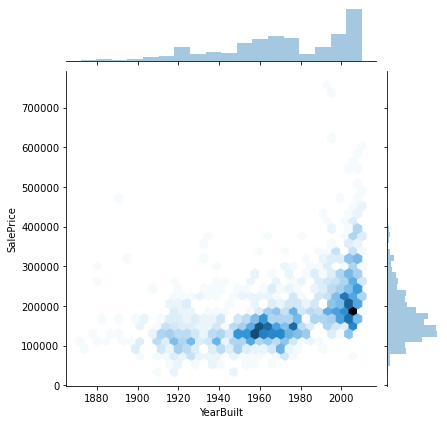

In [45]:
# jointplot with hex

sns.jointplot('YearBuilt','SalePrice',data=dataset, kind='hex')

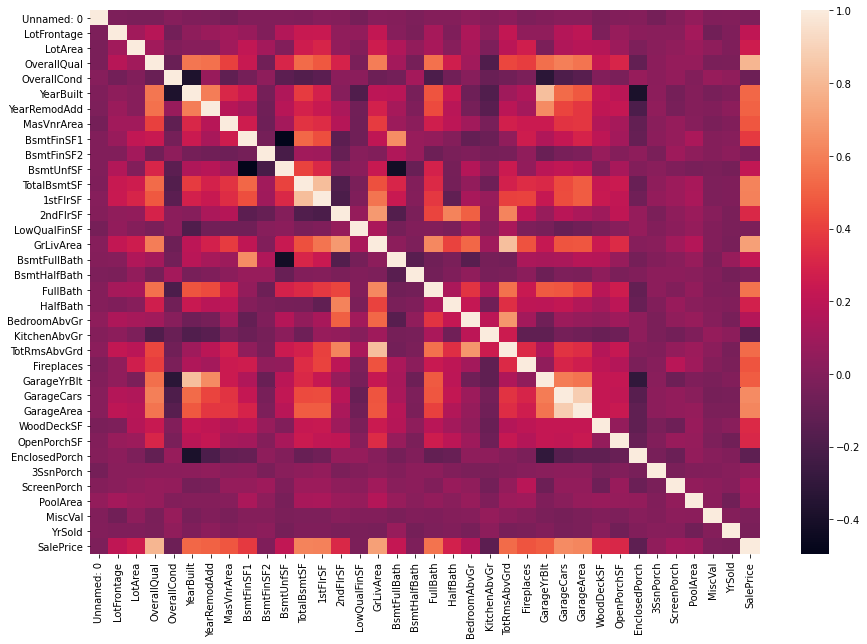

In [46]:
#Heatmap

plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr())

Extract top 10 variables most correlated with our target variable 'SalePrice' for feature extraction

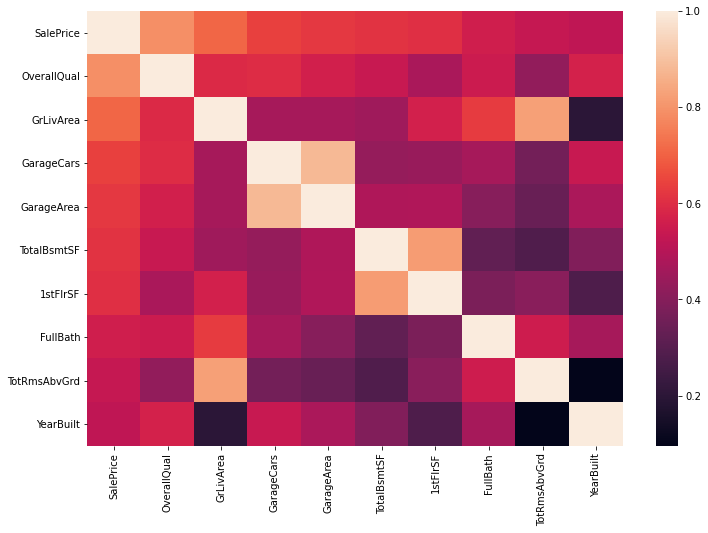

In [48]:
# saleprice correlation matrix

k = 10   # number of variables for heatmap
cols = dataset.corr().nlargest(k, 'SalePrice')['SalePrice'].index
new_corr = dataset[cols].corr()
plt.figure(figsize=(12,8))
sns.heatmap(new_corr)

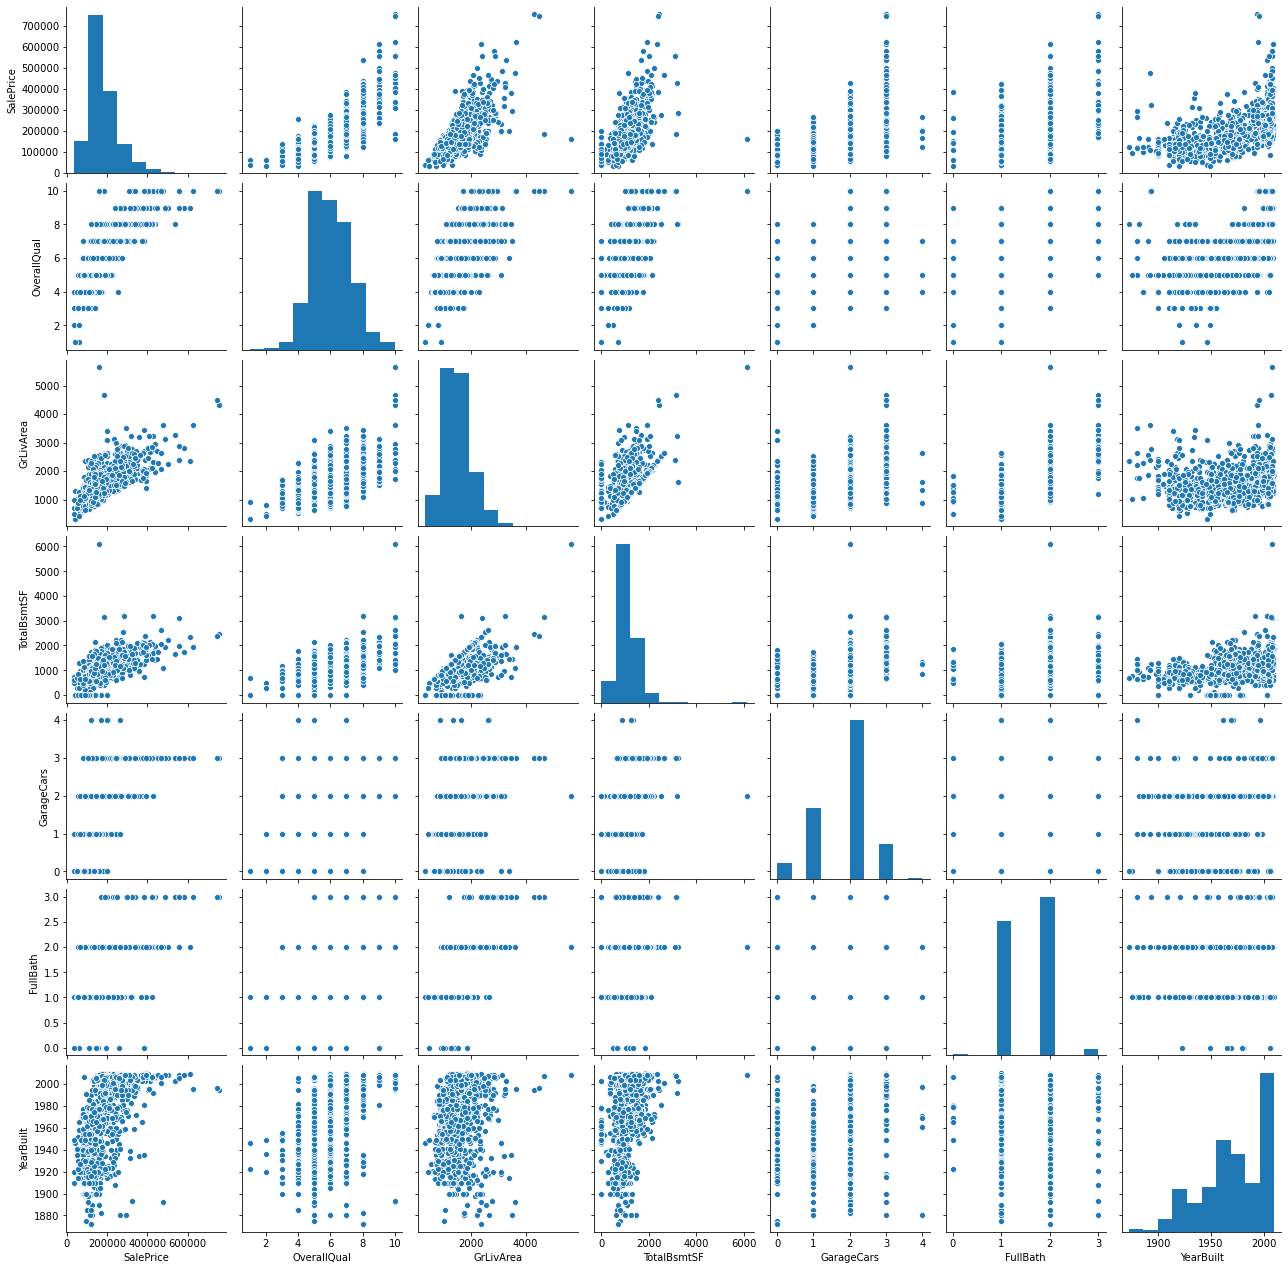

In [55]:
# Visualizing the relations between the major variables 

cols = ['SalePrice','OverallQual','GrLivArea','TotalBsmtSF','GarageCars','FullBath','YearBuilt']
sns.pairplot(dataset[cols])

### Numerical vs Categorical

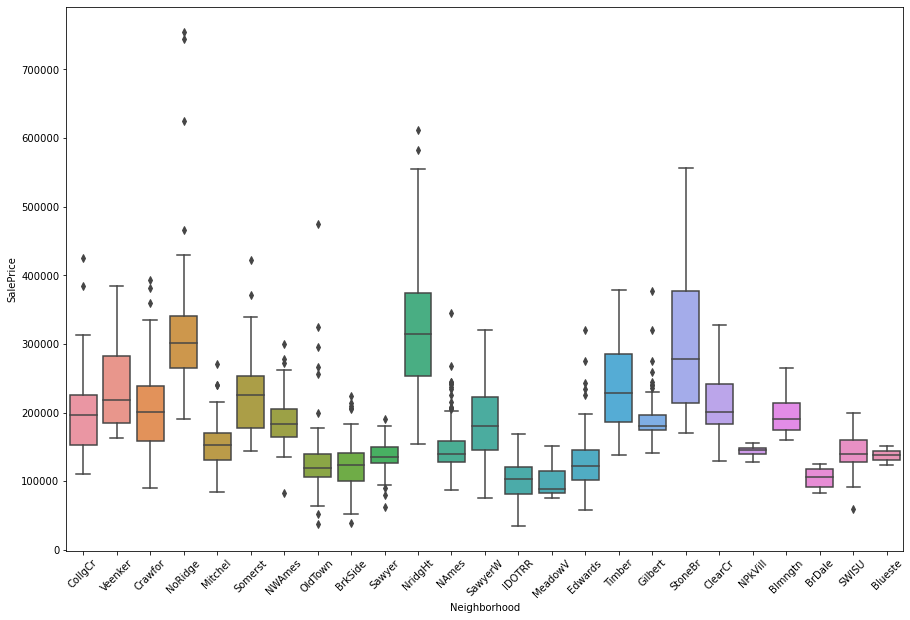

In [57]:
# Boxplot

plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
sns.boxplot('Neighborhood','SalePrice',data=dataset)

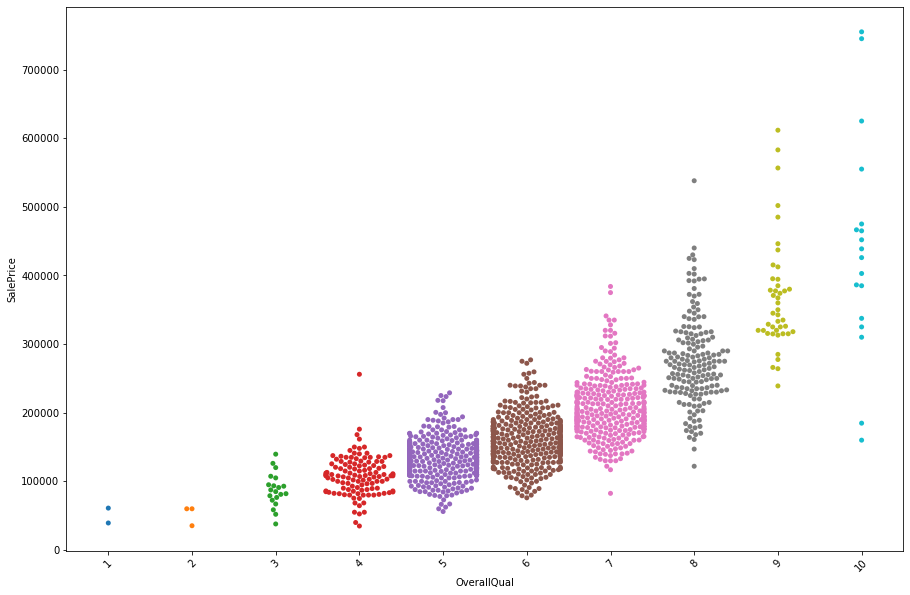

In [58]:
# swarmplot

plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
sns.swarmplot('OverallQual','SalePrice', data=dataset)

### Categorical vs Categorical

In [59]:
#crosstab

crosstab = pd.crosstab(index=dataset['Neighborhood'], columns=dataset['OverallQual'])
crosstab

OverallQual,1,2,3,4,5,6,7,8,9,10
Neighborhood,,,,,,,,,,
Blmngtn,0,0,0,0,0,0,14,3,0,0
Blueste,0,0,0,0,0,2,0,0,0,0
BrDale,0,0,0,0,5,11,0,0,0,0
BrkSide,1,1,3,10,21,18,4,0,0,0
ClearCr,0,0,0,3,6,10,9,0,0,0
CollgCr,0,0,0,1,28,24,71,23,3,0
Crawfor,0,0,0,1,11,19,13,7,0,0
Edwards,1,0,5,25,38,23,5,0,1,2
Gilbert,0,0,0,1,3,33,36,5,1,0


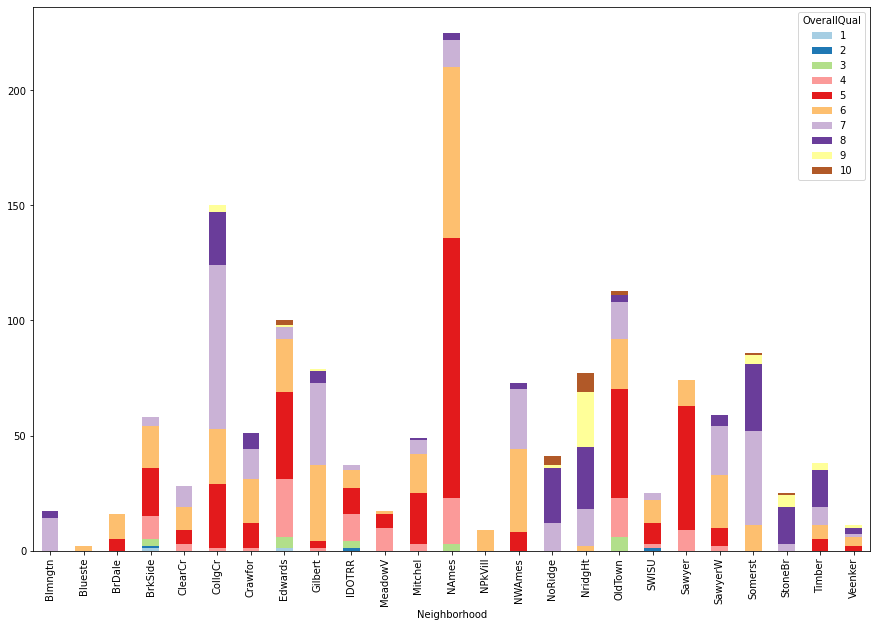

In [60]:
crosstab.plot(figsize=(15,10), kind='bar', stacked=True, colormap='Paired')

## Challenges 

In [62]:
# load automobile dataset

data = pd.read_csv('../data/Automobile_data.csv')
data.head()

,symboling,make,fuel-type,body-style,drive-wheels,wheel-base,length,width,height,horsepower,peak-rpm,highway-mpg,city-mpg,price
0,3,alfa-romero,gas,convertible,rwd,88.6,168.8,64.1,48.8,111,5000,27,21,13495
1,3,alfa-romero,gas,convertible,rwd,88.6,168.8,64.1,48.8,111,5000,27,21,16500
2,1,alfa-romero,gas,hatchback,rwd,94.5,171.2,65.5,52.4,154,5000,26,19,16500
3,2,audi,gas,sedan,fwd,99.8,176.6,66.2,54.3,102,5500,30,24,13950
4,2,audi,gas,sedan,4wd,99.4,176.6,66.4,54.3,115,5500,22,18,17450


### Challenge 1

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   symboling     205 non-null    int64  
 1   make          205 non-null    object 
 2   fuel-type     205 non-null    object 
 3   body-style    205 non-null    object 
 4   drive-wheels  205 non-null    object 
 5   wheel-base    205 non-null    float64
 6   length        205 non-null    float64
 7   width         205 non-null    float64
 8   height        205 non-null    float64
 9   horsepower    205 non-null    int64  
 10  peak-rpm      205 non-null    int64  
 11  highway-mpg   205 non-null    int64  
 12  city-mpg      205 non-null    int64  
 13  price         205 non-null    int64  
dtypes: float64(4), int64(6), object(4)
memory usage: 22.5+ KB


In [64]:
data.describe()

,symboling,wheel-base,length,width,height,horsepower,peak-rpm,highway-mpg,city-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,104.936585,5127.804878,30.751220,25.219512,13476.258537
std,1.245307,6.021776,12.337289,2.145204,2.443522,40.609702,478.414007,6.886443,6.542142,8114.166248
min,-2.000000,86.600000,141.100000,60.300000,47.800000,48.000000,4150.000000,16.000000,13.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,70.000000,4800.000000,25.000000,19.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,95.000000,5200.000000,30.000000,24.000000,10595.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,116.000000,5500.000000,34.000000,30.000000,16558.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,288.000000,6600.000000,54.000000,49.000000,45400.000000


### Challenge 2

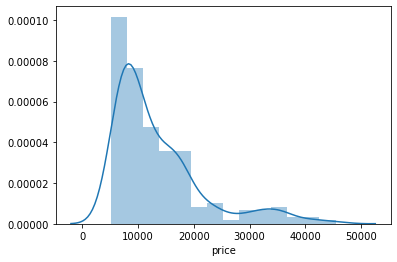

In [67]:
sns.distplot(data['price'], kde=True)

### Challenge 3

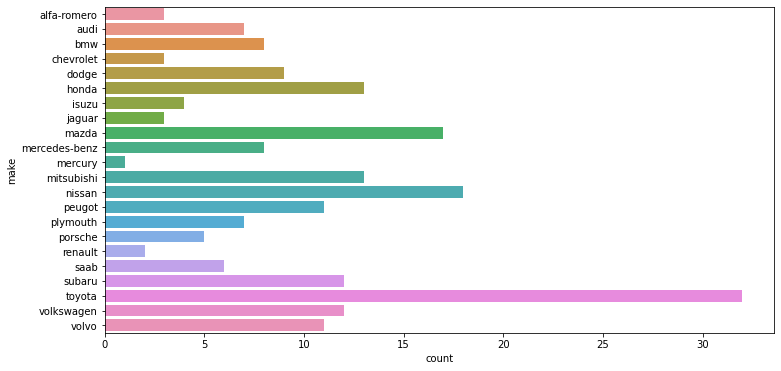

In [72]:
plt.figure(figsize=(12,6))
sns.countplot(y=data['make'])

### Challenge 4

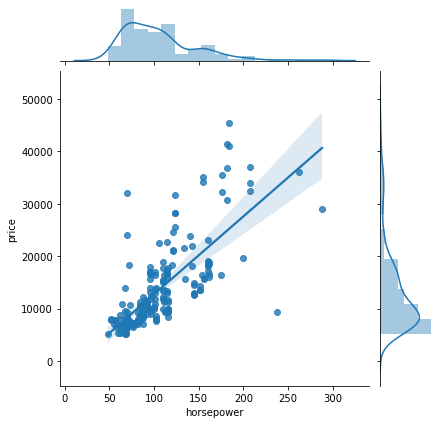

In [74]:
sns.jointplot('horsepower','price', data=data, kind='reg')

### Challenge 5

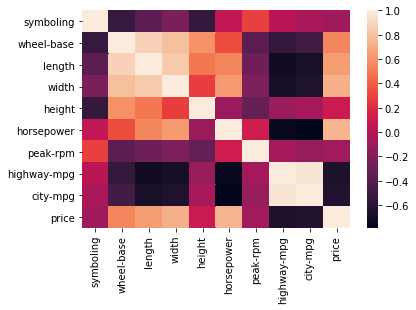

In [75]:
sns.heatmap(data.corr())

### Challenge 6

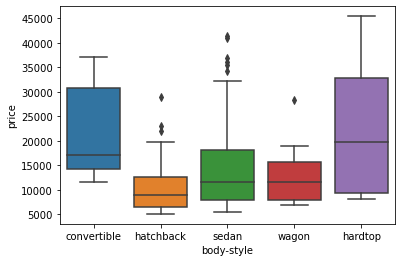

In [77]:
sns.boxplot('body-style','price', data=data)